<a href="https://colab.research.google.com/github/alfafimel/WHO-LIFE-EXPECTANCY-PROJECT/blob/main/WHO_Life_Expectancy_Python_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**


Life expectancy is the number of years that an individual is expected to live as determined by statistics. It is the age to which an average person is expected to live, based on the person’s sex, health factors, and other demographic data.Population ageing has become an important developmental issue that requires urgent action.



##**Problem Statement**

What factors contribute to life expectancy as observed from 2000-2015 in the world.

##**Objectives**
Specific objectives/Research questions

-Is there a difference between life expectancy in developing countries and developed? What contributes to this difference?

-How have the different variables affected life expectancy?

-How has life expectancy changed over time in the different countries of the world and in particular eastern Africa?

-What is driving this change in life expectancy?

-What is the impact of immunization coverage on life expectancy?

-Do countries need to improve their health care to reduce mortality rate or increase life expectancy?

-Which factors contribute highly to life expectancy?

-What is the relationship between the overall health(BMI, alcohol) of citizens of a particular country and the life expectancy?

-What factors need to be improved in the countries in Eastern Africa with low life expectancy?...i.e schooling, immunization, healthcare expenditure?

-What is the predicted life  expectancy in the different countries in Eastern Africa in the next 5 years?(2020)


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading data 

In [ ]:
df = pd.read_csv("datasets_12603_17232_Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Checking the data

In [ ]:
# number of rows and columns
df.shape

(2938, 22)

In [ ]:
# preview first 5 rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# preview last 5 rows
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
# checking the datatype of each column
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

# Data Cleaning

## **Standardising column names**

In [ ]:
# fixing messy column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# preview column names to see changes made
print(df.columns)


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


## **Duplicated entries**

In [ ]:
# check for duplicated rows 
df.duplicated().sum()

# none found

0

## **Null Values**

In [ ]:
# check for null values
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [ ]:
# select a list of all countries from the country column
country_list = df.country.unique()

# create a list of the other columns with null values that need to be interpolated
interpolate_list =['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 
                   'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 
                   'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 
                   'thinness__1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 
                   'schooling']

# interpolate the different columns for each country separately
for country in country_list:
    df.loc[df['country'] == country,interpolate_list] = df.loc[df['country'] == country,interpolate_list].interpolate()

In [ ]:
# sum of null values per column after interpolation
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        144
measles                              0
bmi                                 34
under-five_deaths                    0
polio                                0
total_expenditure                  211
diphtheria                           0
hiv/aids                             0
gdp                                422
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [ ]:
# drop the remaining null values 
df.dropna(inplace=True)
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
#Exporting the already cleaned dataset
df1=df.copy()
df1.to_csv('cleaned.csv')

## **Outliers**

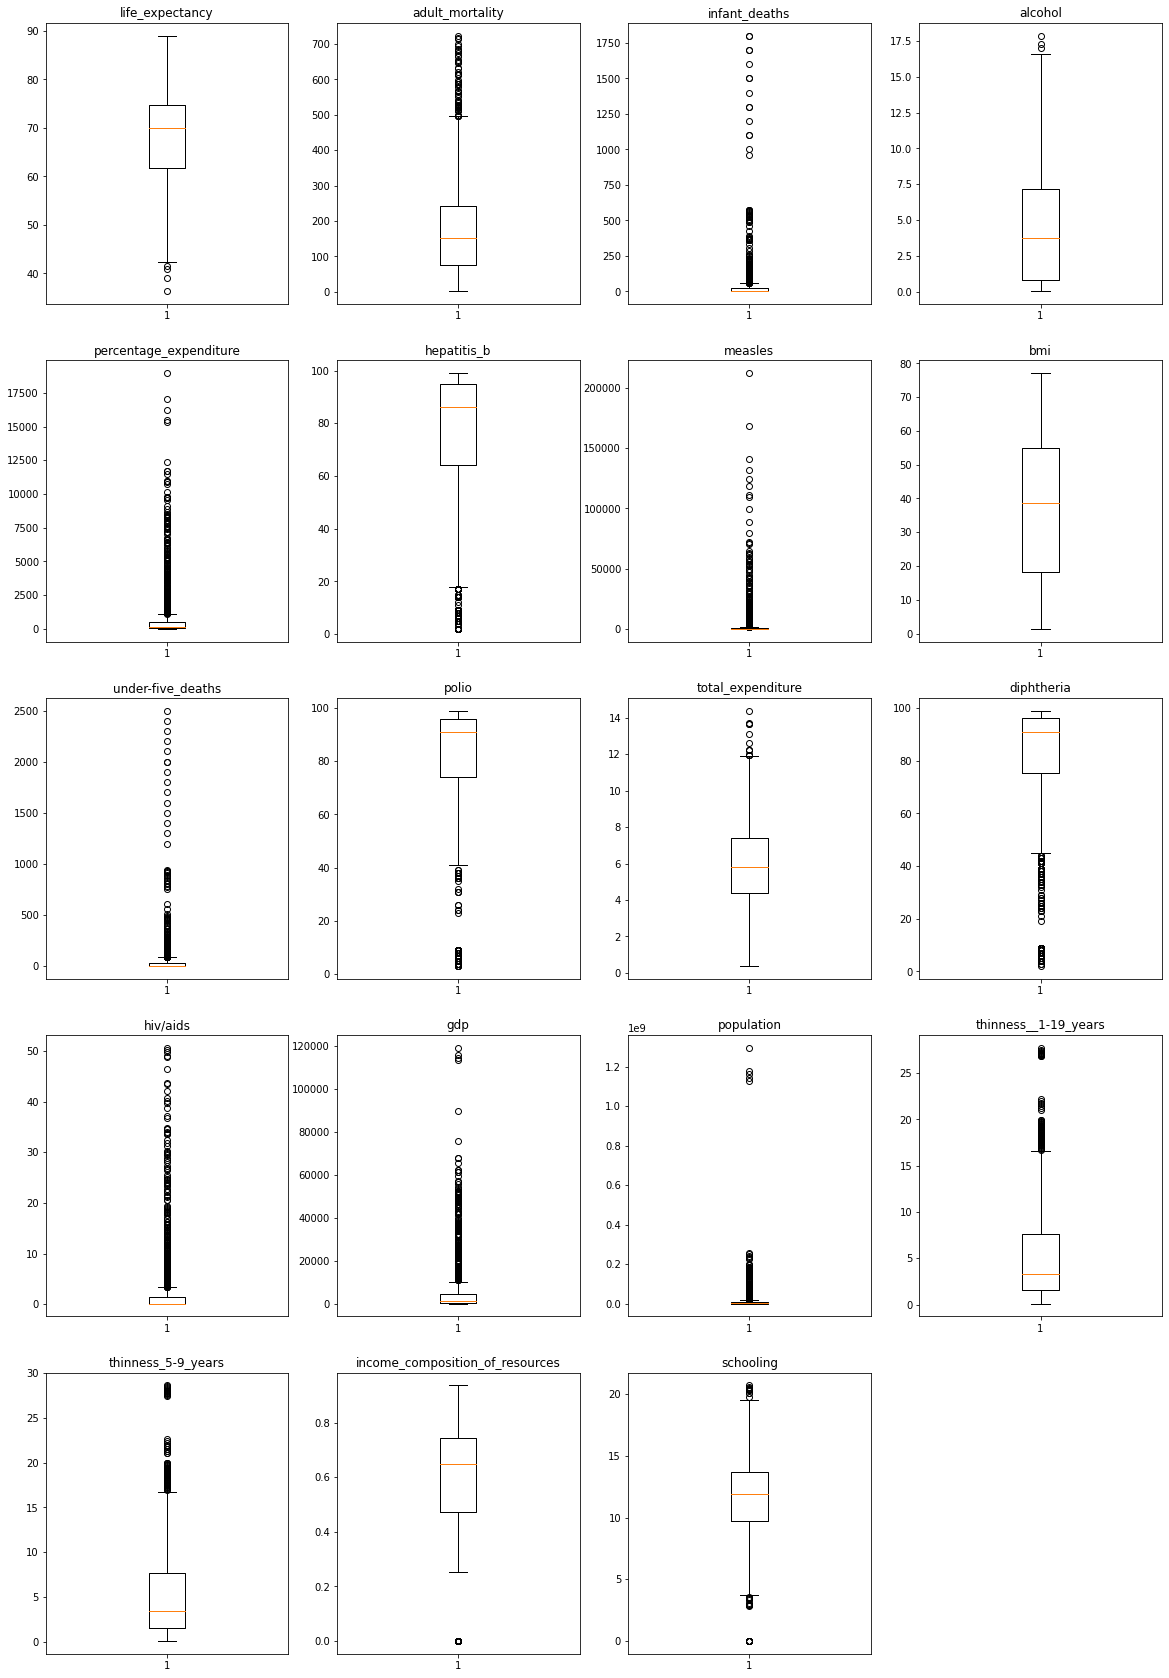

In [ ]:
# save the column names onto a dictionary
columns_dict={'life_expectancy': 1, 'adult_mortality': 2, 'infant_deaths': 3, 'alcohol': 4, 
                   'percentage_expenditure': 5, 'hepatitis_b': 6, 'measles': 7, 'bmi': 8, 'under-five_deaths': 9, 
                   'polio': 10, 'total_expenditure': 11, 'diphtheria': 12, 'hiv/aids': 13, 'gdp': 14, 'population': 15, 
                   'thinness__1-19_years': 16, 'thinness_5-9_years': 17, 'income_composition_of_resources': 18, 
                   'schooling': 19}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()

In [ ]:
# dealing with outliers

# print(f"Size of dataset with outliers: {df.shape}")
# # dealing with outliers
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# print("...................")

# print(f"Size of dataset after removal of outliers: {df.shape}")

## **Anomalies**

In [ ]:
# checking for anomalies

# find quartile ranges for the column sum of bluecars_taken
q1_life_e = df['life_expectancy'].quantile(.25)
q3_life_e = df['life_expectancy'].quantile(.75)

# calculating inter-quartile range using values from above
iqr_life_e = q3_life_e - q1_life_e

# another way is to find quantiles using the percentiles from the numpy library
q1_l_e, q3_l_e = np.percentile(df['life_expectancy'], [25, 75]) 
# IQR
iqr_l_e = q3_l_e - q1_l_e

# compare if the two values are similar
print(iqr_life_e, iqr_l_e)

13.0 13.0


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,80.371917,5.902728,80.454454,2.274937,5392.335709,1.358390e+07,5.129995,5.199346,0.603453,11.639054
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,24.363376,2.287467,24.450153,6.005112,11480.810350,6.490113e+07,4.750149,4.844382,0.206026,3.212964
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.936000,20.700000


Text(0.5, 1.0, 'Distribution of countries per their statuses')

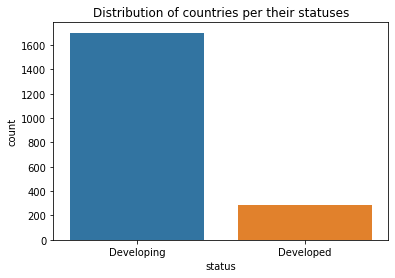

In [ ]:
#Histogram of the status of different countries
ax = sns.countplot(df['status'], order = df['status'].value_counts().index)
plt.title('Distribution of countries per their statuses')

Text(0, 0.5, 'count')

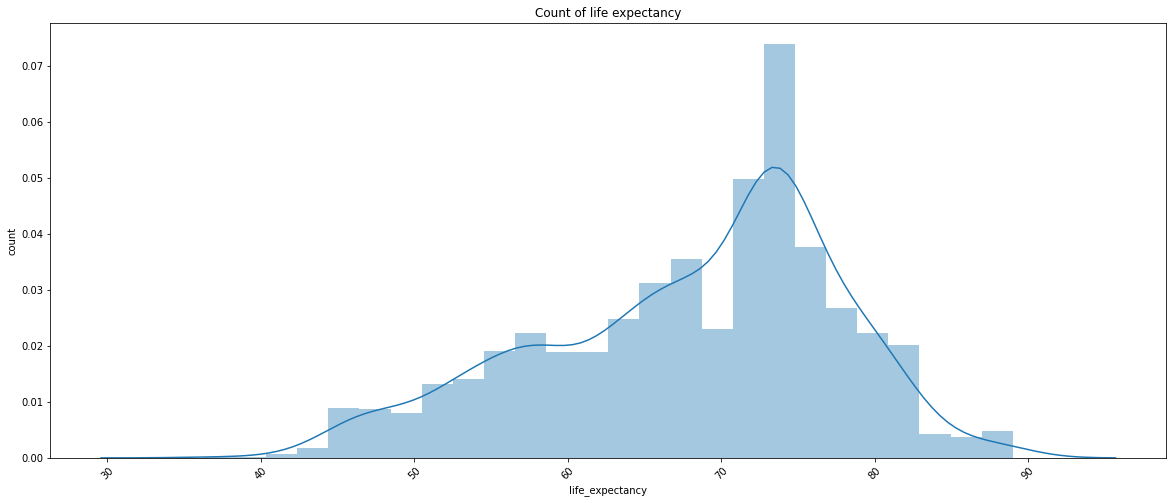

In [ ]:
#Histogram of the life_expectancy of different countries
plt.figure(figsize=(20,8))
ax = sns.distplot(df['life_expectancy'])
plt.title('Count of life expectancy')
plt.xticks(rotation=45)
plt.ylabel('count')

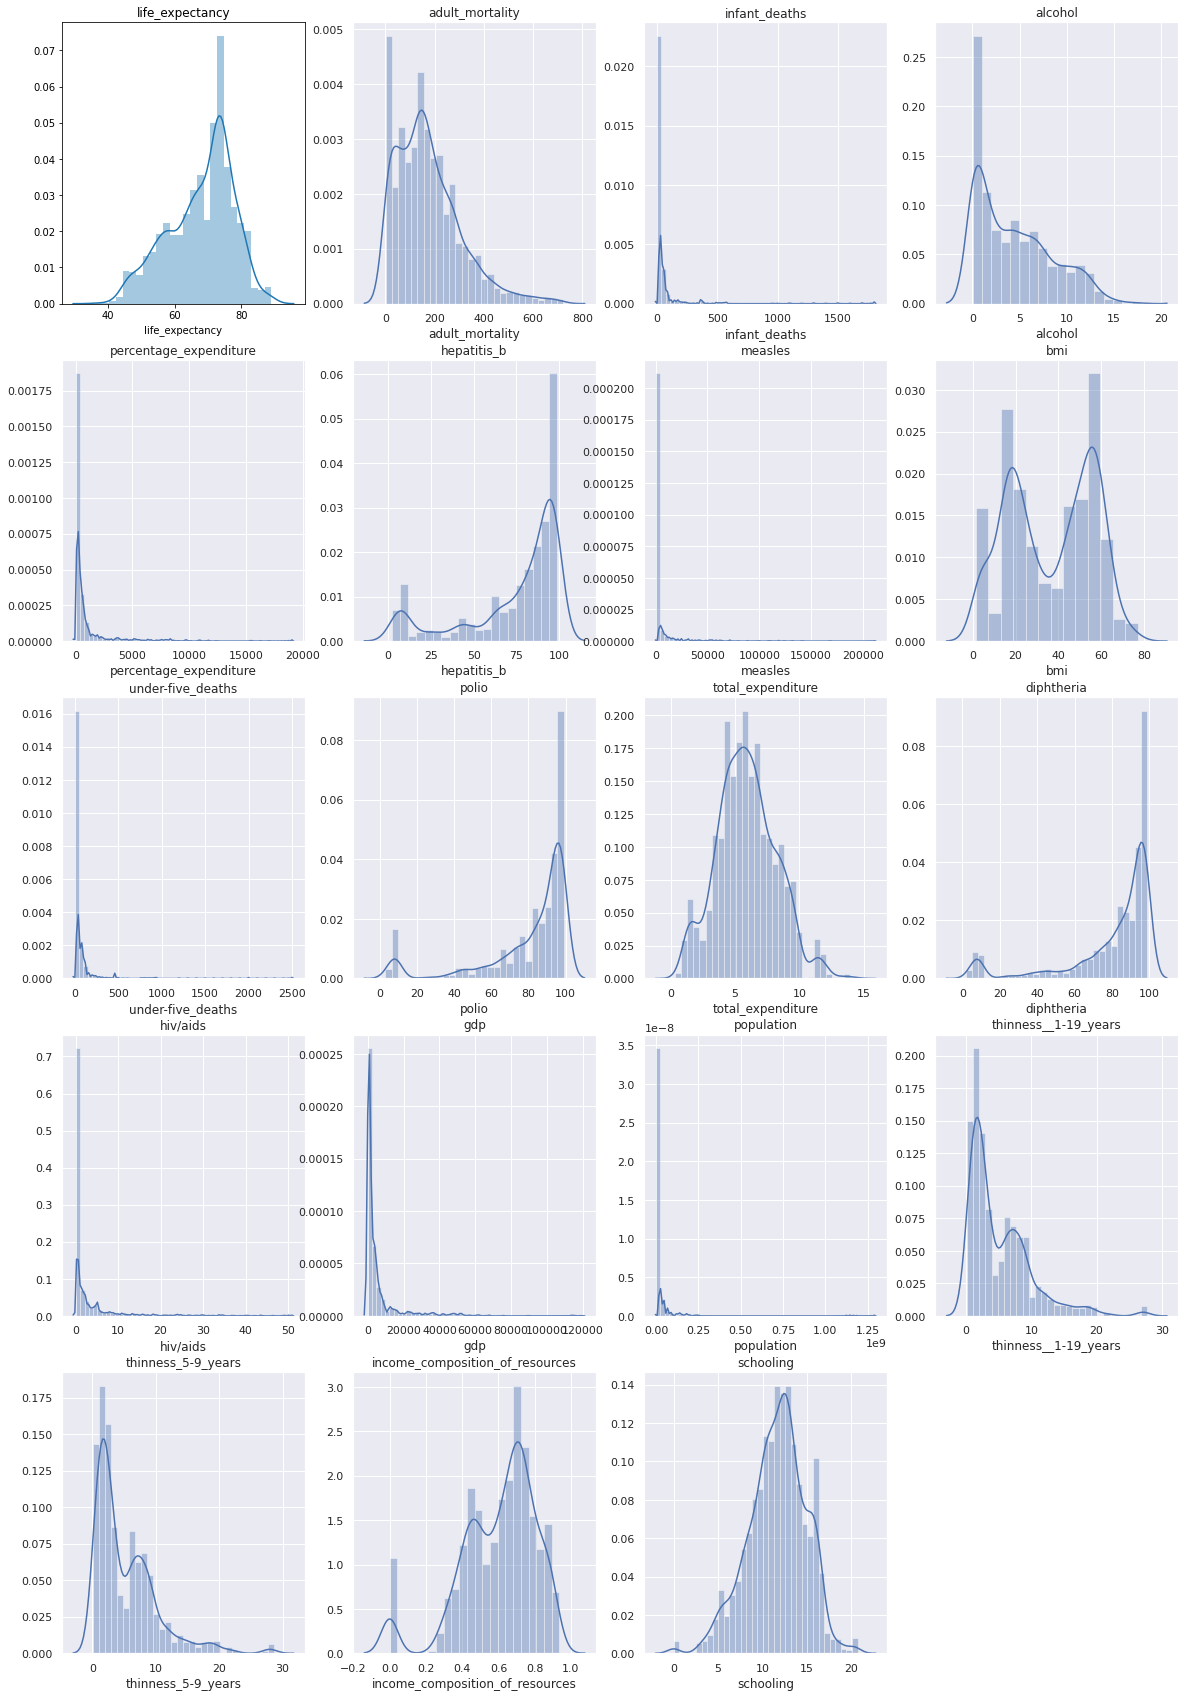

In [ ]:
columns_dict={'life_expectancy': 1, 'adult_mortality': 2, 'infant_deaths': 3, 'alcohol': 4, 
                   'percentage_expenditure': 5, 'hepatitis_b': 6, 'measles': 7, 'bmi': 8, 'under-five_deaths': 9, 
                   'polio': 10, 'total_expenditure': 11, 'diphtheria': 12, 'hiv/aids': 13, 'gdp': 14, 'population': 15, 
                   'thinness__1-19_years': 16, 'thinness_5-9_years': 17, 'income_composition_of_resources': 18, 
                   'schooling': 19}

plt.figure(figsize=(20,30) )

# make a histogram plot for each variable column
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df[variable])
  sns.set(style='darkgrid')
  plt.title(variable)

plt.show()

In [ ]:
df_skew = df.drop('year', axis = 1)

print(df_skew.skew())

life_expectancy                    -0.531505
adult_mortality                     1.140995
infant_deaths                       8.568802
alcohol                             0.695528
percentage_expenditure              4.762827
hepatitis_b                        -1.311729
measles                             8.764714
bmi                                -0.095303
under-five_deaths                   8.316159
polio                              -1.881600
total_expenditure                   0.238713
diphtheria                         -1.903185
hiv/aids                            4.544181
gdp                                 4.298171
population                         15.140323
thinness__1-19_years                1.657464
thinness_5-9_years                  1.715890
income_composition_of_resources    -1.014837
schooling                          -0.373064
dtype: float64


In [ ]:
print(df_skew.kurt())

life_expectancy                     -0.360747
adult_mortality                      1.608679
infant_deaths                       86.355275
alcohol                             -0.513587
percentage_expenditure              28.027316
hepatitis_b                          0.444243
measles                            100.421167
bmi                                 -1.358437
under-five_deaths                   81.576201
polio                                2.817216
total_expenditure                    0.025625
diphtheria                           2.818479
hiv/aids                            23.975688
gdp                                 24.987776
population                         266.685657
thinness__1-19_years                 3.488271
thinness_5-9_years                   3.829406
income_composition_of_resources      1.152894
schooling                            0.323281
dtype: float64


**Findings**

- There are more developing countries than developed countries
- Most of the data appears to be normally distributed
- The columns life expectancy, hepatitis b, bmi, polio, diphteria, income composition of resources and schooling are negatively skewed to the left while the rest are positively skewed to the right


##Bivariate Analysis

In [ ]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [ ]:
# pick out the columns needed to plot
needed= df.drop(['country','year','status'], axis=1)


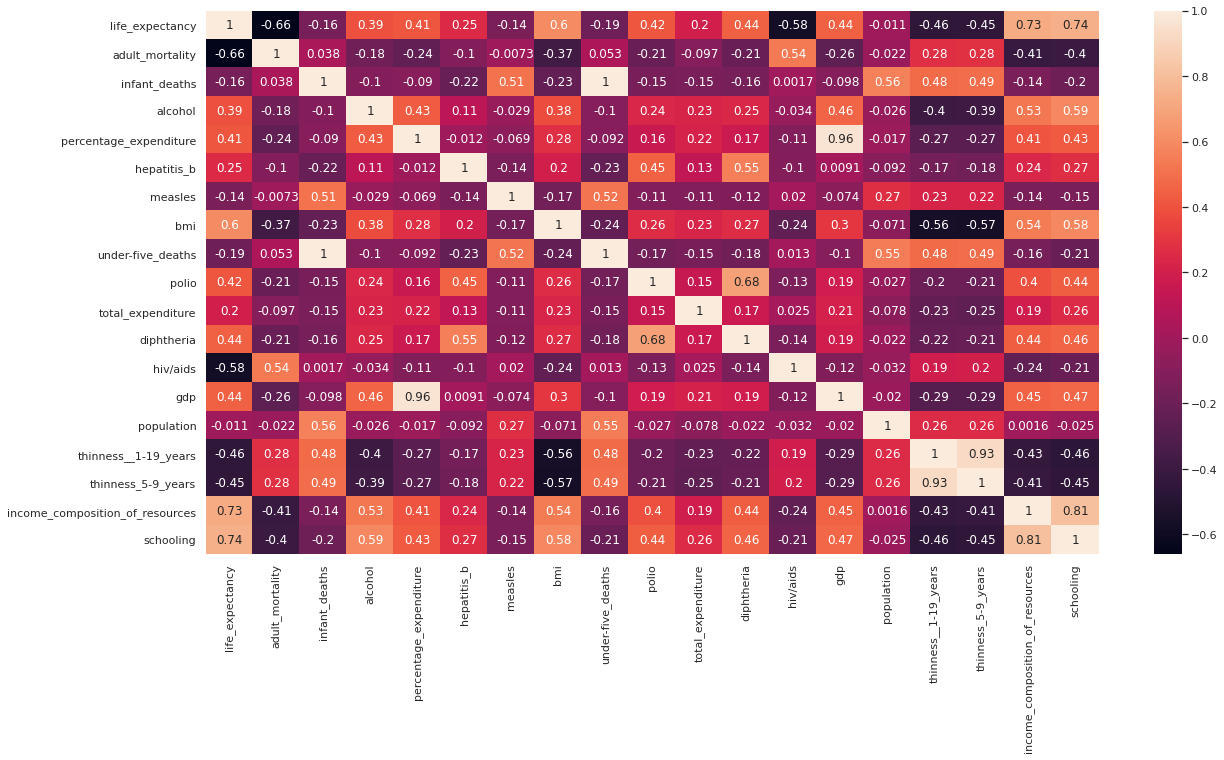

In [ ]:
#Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(needed.corr(), annot=True)

- **Life expectancy:** 
 - There is a **negative correlation** between life expectancy and the following fields: adult mortality, hiv/aids and thinness of both 1-19 years and 5-9 years. 

   - This suggests that if more adults die, more infants die from hiv/aids and if more of the population is thin(from poor nutrition) life expectancy is expected to go lower

  - There is a **positive correlation** between life expectancy and the following fields: bmi, schooling and income composition of resources 

- There is a **positive correlation** between adult mortality rate and hiv/aids suggesting that most adult deaths occur from hiv/aids compared to infant deaths

- There is a **positive** correlation between infant deaths and measles, population and thinness. This suggests that most infant deaths that occur are due to measles and poor nutrition

- There is a positively high correlation between alcohol and income composition of resources and schooling. This suggests that more people who have a higher income and have schooled for more years are more prone to consuming alcohol.

- There is a very high positive correlation of 0.96 between percentage expenditure on health and gdp of a country. If a countries gdp is high, it is expected that a larger percentage is directed towards the health sector. 

- Hepatitis b is positively correlated with polio and diphteria. They are all immunizable diseases.

- BMI is positively correlated with schooling and income composition of resources and negatively correlated with thinness. Going to school ensures that a population is fed and hence improved nutrition.

##Multivariate analysis

In [ ]:
df2=needed.drop(['life_expectancy'], axis=1)

In [ ]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df2)
chi_square_value, p_value
#The p vlaue is 0 the observed matrix is not an identity matrix.

(31177.507984860462, 0.0)

In [ ]:
# Creating factor analysis object and perform factor 
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(df2,18, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
# Here, we can see only for 5-factors eigenvalues are greater than one. 
# It means we need to choose only 5 factors (or unobserved variables).

,Original_Eigenvalues
0,5.718278
1,2.708570
2,1.812644
3,1.442644
4,1.115397
5,0.858556
6,0.781238
7,0.679065
8,0.534485
9,0.505775


In [ ]:
fa = FactorAnalyzer()
fa.analyze(df2, 5, rotation="varimax")
fa.loadings

# We will note that
# Factor 1 has high factor loadings for alcohol,bmi,thiness 10-19. thinness 5-9 and schooling(nutrition)
# Factor 2 has high factor loadings for infant deaths, under-five deaths and population(infant death per population)
# Factor 3 has high factor loadings for hepatitis-b, polio, diphtheria(immunizable diseases)
# Factor 4 has high factor loadings for percentage expenditure,gdp (economic status)
# Factor 5 has high factor loadings for adult mortality,hiv/aids(death rate)

,Factor1,Factor2,Factor3,Factor4,Factor5
adult_mortality,-0.238764,-0.033351,-0.139183,-0.144202,0.678644
infant_deaths,-0.170341,0.972101,-0.102178,-0.029168,-0.000120
alcohol,0.521207,0.040903,0.203275,0.374983,0.035208
percentage_expenditure,0.199217,-0.040137,0.022921,0.923566,-0.095866
hepatitis_b,0.088095,-0.160559,0.591651,-0.072090,-0.051088
measles,-0.078664,0.490944,-0.115775,-0.041070,0.000168
bmi,0.609077,-0.103070,0.202789,0.141477,-0.254227
under-five_deaths,-0.171083,0.965234,-0.125367,-0.029761,0.016963
polio,0.147752,-0.061038,0.720672,0.099946,-0.087321
total_expenditure,0.253200,-0.097670,0.140301,0.163684,0.046940


In [ ]:
# Step 14: Getting variance of each factors
# 
fa.get_factor_variance()

# Noting total 62% cumulative Variance explained by the 5 factors.
# We conclude that the we have found 5 factors that contribute highly to the life expectancy of a country.
# 

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.898070,2.773663,2.111081,2.226851,1.267885
Proportion Var,0.161004,0.154092,0.117282,0.123714,0.070438
Cumulative Var,0.161004,0.315096,0.432379,0.556093,0.626531


**Findings**

From multivariate analysis, we were able to perform reduction technique using Factor analysis.

We came up with five factors which we named: 
- nutrition (alcohol,bmi,thiness 10-19. thinness 5-9 and schooling)
- infant deaths per population (infant deaths, under-five deaths and population)
- immunizable diseases (hepatitis-b, polio, diphtheria)
- economic factors (percentage expenditure,gdp) 
- death rates (adult mortality,hiv/aids)

These factors are considered to have a huge effect on the life expectancy of a country.



# **Time series analysis**

In [ ]:
# select only countries in Eastern Africa
df1_t = df[(df['country'] == 'Kenya') | (df['country'] == 'Uganda') | (df['country'] == 'United Republic of Tanzania') |
           (df['country'] == 'Sudan') | (df['country'] == 'South Sudan') | (df['country'] == 'Somalia') |
           (df['country'] =='Eritrea') | (df['country'] == 'Djibouti') | (df['country'] == 'Rwanda') | 
           (df['country'] == 'Burundi')| (df['country'] == 'Ethiopia')]

# which countries are represented in the dataframe
df1_t.country.unique()


array(['Burundi', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Rwanda',
       'Uganda'], dtype=object)

In [ ]:
# pick out the columns to be analyzed
dfts = df1_t[['life_expectancy', 'year', 'country']]
dfts.head()

,life_expectancy,year,country
417,59.1,2014,Burundi
418,58.6,2013,Burundi
419,58.0,2012,Burundi
420,57.4,2011,Burundi
421,56.8,2010,Burundi


In [ ]:
# Convert this dataframe into a “wide” dataframe with each country on its own column
# so that when plotting each country has its own line plot

dfts_1 = dfts.pivot(index='year', columns='country', values='life_expectancy')
dfts_1.head()

country,Burundi,Djibouti,Eritrea,Ethiopia,Kenya,Rwanda,Uganda
year,,,,,,,
2000,58.0,57.4,45.3,51.2,51.9,48.3,46.6
2001,51.3,57.7,58.1,52.5,51.9,48.6,47.7
2002,51.5,57.9,58.5,53.2,52.1,57.0,48.8
2003,51.9,58.0,58.8,54.0,52.4,52.0,51.0
2004,52.6,58.1,59.1,55.0,53.0,53.4,51.3


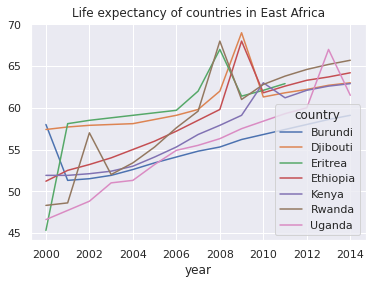

In [ ]:
# plot the life expectancy through the years

dfts_1.plot.line(title = 'Life expectancy of countries in East Africa')


# Hypothesis testing

# **Hypothesis test I**

We wish to investigate whether there is a statistically significant difference in the mean life expectancy between developing and developed countries at a significance level of 5%

Is this value greater in developed countries than in developing countries?

- Null Hypothesis, H0: the mean life expectancy equal/similar in developed and developing countries from 2000-2015
- Alternate Hypothesis, H1: the mean life expectancy is not equal in developed and developing countries(is it lower or higher)(claim)

In [ ]:
# select the specific columns to investigate
df1=df[['country', 'life_expectancy', 'status', 'year', 'polio']]
df1.head()

,country,life_expectancy,status,year,polio
0,Afghanistan,65.0,Developing,2015,6.0
1,Afghanistan,59.9,Developing,2014,58.0
2,Afghanistan,59.9,Developing,2013,62.0
3,Afghanistan,59.5,Developing,2012,67.0
4,Afghanistan,59.2,Developing,2011,68.0


In [ ]:
#Encoding the status column
df1['status'] = df1.status.map({'Developing': 0, 'Developed': 1})
print(df1.head())
#Changing the data type of status column to integer
df1['status']= df1['status'].astype(int)
#Grouping by country and status
df3=df1.groupby(['country', 'status'])['life_expectancy'].mean()
df3

       country  life_expectancy  status  year  polio
0  Afghanistan             65.0       0  2015    6.0
1  Afghanistan             59.9       0  2014   58.0
2  Afghanistan             59.9       0  2013   62.0
3  Afghanistan             59.5       0  2012   67.0
4  Afghanistan             59.2       0  2011   68.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


country      status
Afghanistan  0         58.193750
Albania      0         75.156250
Algeria      0         73.486667
Angola       0         48.793333
Argentina    0         75.080000
                         ...    
Uruguay      0         76.013333
Uzbekistan   0         67.940000
Vanuatu      0         71.346667
Zambia       0         53.380000
Zimbabwe     0         49.386667
Name: life_expectancy, Length: 133, dtype: float64

In [ ]:
# save the grouped data as a csv file
df3.to_csv("hypothesis.csv")
df3 = pd.read_csv("hypothesis.csv")
df3.head()

,country,status,life_expectancy
0,Afghanistan,0,58.193750
1,Albania,0,75.156250
2,Algeria,0,73.486667
3,Angola,0,48.793333
4,Argentina,0,75.080000


In [ ]:
df3['status'].value_counts()

# there is a total of 114 developing countries and 19 developed countries in the data

0    114
1     19
Name: status, dtype: int64

In [ ]:
# select only developing countries onto a new dataframe
developing = df3.loc[df3.status == 0]
developing.head()

,country,status,life_expectancy
0,Afghanistan,0,58.193750
1,Albania,0,75.156250
2,Algeria,0,73.486667
3,Angola,0,48.793333
4,Argentina,0,75.080000


In [ ]:
# select only developed countries
developed = df3.loc[df3.status == 1]
developed.head()

,country,status,life_expectancy
6,Australia,1,81.746667
7,Austria,1,81.480000
11,Belgium,1,80.653333
18,Bulgaria,1,72.740000
32,Croatia,1,75.993333


**Sampling**

Sampling in this project did not seem to be the best option to undertake as there are few countries in our population. Sampling would reduce the size of data size to investigate and leading to inappropriate conclusions, hence we decided to work with the whole population.

In [ ]:
# # Stratified sample
# strat_output = df3.groupby('status', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.4))

# # proportion of the stratified sample
# print(strat_output['status'].value_counts())

# # Check the stratified output
# strat_output.head()

## **Normality Testing**

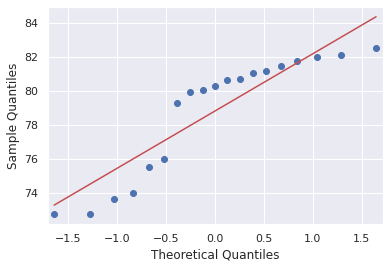

In [ ]:
#Checking if the data in the developed countries is normally distributed
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(developed['life_expectancy'], line='s')
plt.show()

#It is normally distributed therefore we can perform the statistic tests.

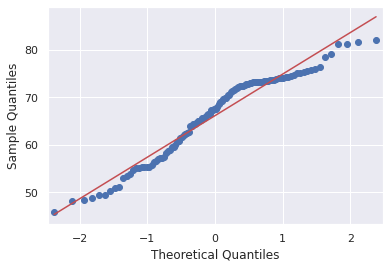

In [ ]:
# normality test for the life expectancy in developing countries
qqplot(developing['life_expectancy'], line='s')
plt.show()

From both populations, the data is normally distributed about the mean 

## Statistical Testing

This is a two-tailed test, using a Z statistic(since sample size > 30) and a 5% level of significance.

The critical region defined for a two-tailed z-test at 0.05 significance level is 1.960.

Therefore, Reject the null hypothesis if Z < -1.960 or is Z > 1.960.

In [ ]:
# compute the means for both populations
mean_developing = developing['life_expectancy'].mean()
mean_developed = developed['life_expectancy'].mean()

print(f"The mean life expectancy of developing countries: {mean_developing}")
print(f"The mean life expectancy of developed countries: {mean_developed}")
# compute the standard deviations for both populations
s1 = developing['life_expectancy'].std()
s2 = developed['life_expectancy'].std()

# compute the count/number in each population
n1 = developing['life_expectancy'].count()
n2 = developed['life_expectancy'].count()
print(f"S1 is: {s1} while s2 is: {s2}")
print("..............")
import math

# pooled estimate of the common stadard deviation
sp = math.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2)) 

print(f"The pooled estimate of the commom stdev is: {round(sp,3)}, which is a value between {round(s1,3)} and {round(s2,3)}")
# sp is a number between the standard deviations of both stdev of both samples

The mean life expectancy of developing countries: 66.18138157894734
The mean life expectancy of developed countries: 78.83157894736841
S1 is: 8.802853491784571 while s2 is: 3.4634257230076946
..............
The pooled estimate of the commom stdev is: 8.276, which is a value between 8.803 and 3.463


In [ ]:
# z-score
z = (mean_developing-mean_developed)/(sp*math.sqrt((1/n1)+(1/n2)))
z

-6.168565484073591

The z-score is less than -1.960. It falls within the critical region defined by Z < -1.960 or is Z > 1.960.

Therefore, we reject the null hypothesis and accept the alternate hypothesis that the mean life expectancy between the developed and developing countries is different

There is enough statistical significance evidence at α=0.05 to show that there is a difference between the mean life expectancy of developed and ddeveloping countries

In [ ]:
#Performing the test statistic using python's scipy stats library:

# importing libraries
from scipy import stats
from statsmodels.stats import weightstats as stests

# computing the z_test and p-value
ztest ,pval1 = stests.ztest(developing['life_expectancy'], developed['life_expectancy'], value=0,alternative='two-sided')
print(ztest, pval1)
if pval1 < 0.05:
    print("reject null hypothesis and accept the alternate hypothesis")
else:
    print("accept null hypothesis")


-6.168565484073576 6.89123103646744e-10
reject null hypothesis and accept the alternate hypothesis


In [ ]:
# difference of the two means
diff = mean_developed-mean_developing
diff

12.650197368421075

The p-value is less than the set alpha level of 0.05. We reject the null hypothesis and accept the alternate hypothesis

Here again, we find that there is enough statistical evidence to show that there is a difference between mean of the life expectancy of developed and developing countries.

Notice that there is a difference in the two means is 12.65 which indicates a significant difference

**Conclusion:** Life expectancy in developed countries is higher than in developing countries


# **Hypothesis Testing II**

We wish to investigate whether there is a statistically significant difference in the mean immunization coverage in developed and developing countries which was initially observed to be a contributing factor in improving life expectancy 

- Null hypothesis, H0: there is no difference between the mean immunization coverage in developed and developing countries 
- Alternate hypothesis, H1: there is a difference between the mean immunization coverage in developed and developing countries

We will use a significance level of 5%

There were three immunizable diseases initially observed: hepatitis-b, polio, diphtheria. 

We will focus on polio as most developing countries do not have a good polio immunization coverage. 

In [ ]:
df1.head()

#Grouping by country and status
df4=df1.groupby(['country', 'status'])['polio'].mean()
df4


country      status
Afghanistan  0         48.375000
Albania      0         98.125000
Algeria      0         91.533333
Angola       0         48.733333
Argentina    0         93.400000
                         ...    
Uruguay      0         94.200000
Uzbekistan   0         98.533333
Vanuatu      0         66.266667
Zambia       0         68.066667
Zimbabwe     0         74.800000
Name: polio, Length: 133, dtype: float64

In [ ]:
# export the dataframe as a new csv
df4.to_csv("polio.csv")

# read csv file
df4 = pd.read_csv("polio.csv")
df4.head()

,country,status,polio
0,Afghanistan,0,48.375000
1,Albania,0,98.125000
2,Algeria,0,91.533333
3,Angola,0,48.733333
4,Argentina,0,93.400000


In [ ]:
# select only developed countries
developed_polio = df4.loc[df4.status == 1]
developed_polio.head()

,country,status,polio
6,Australia,1,86.333333
7,Austria,1,85.533333
11,Belgium,1,97.666667
18,Bulgaria,1,94.466667
32,Croatia,1,95.600000


In [ ]:
# select only developed countries
developing_polio = df4.loc[df4.status == 0]
developing_polio.head()


,country,status,polio
0,Afghanistan,0,48.375000
1,Albania,0,98.125000
2,Algeria,0,91.533333
3,Angola,0,48.733333
4,Argentina,0,93.400000


## **Normality Tests**

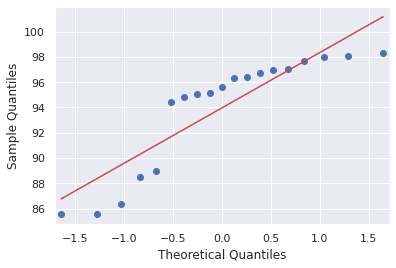

In [ ]:
# normality test for polio immunization coverage in developed countries 
# q-q plot
qqplot(developed_polio['polio'], line='s')
plt.show()

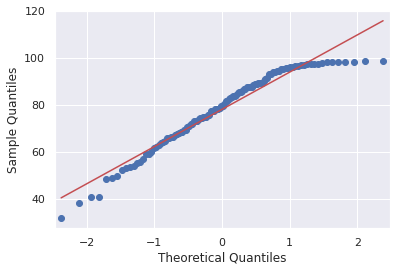

In [ ]:
# normality test for polio immunization coverage in developing countries
# q-q plot
qqplot(developing_polio['polio'], line='s')
plt.show()

From both populations, the data is normally distributed about the mean 

## **Computing the test statistic**

This is a two-tailed test, using a Z statistic(since sample size > 30) and a 5% level of significance.

The critical region defined for a two-tailed z-test at 0.05 significance level is 1.960.

Therefore, Reject the null hypothesis if Z < -1.960 or is Z > 1.960.

In [ ]:
# Using a Z-Score
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval1 = stests.ztest(developing_polio['polio'], developed_polio['polio'], value=0,alternative='two-sided')
print(ztest, pval1)
if pval1 < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

-4.287702336850096 1.805307887087757e-05
reject null hypothesis


The z-score is less than -1.960. It falls within the critical region defined by Z < -1.960 or is Z > 1.960.

Therefore, we reject the null hypothesis and accept the alternate hypothesis that the mean immunization coverage of polio between the developed and developing countries is different

There is enough statistical significance evidence at α=0.05 to show that there is a difference between the mean immunization coverage of developed and developing countries

The p-value is less than the set alpha level of 0.05. Again we reject the null hypothesis and accept the alternate hypothesis

Here again, we find that there is enough statistical evidence to show that there is a difference between mean of the life expectancy of developed and developing countries.

In [ ]:
mean_developing_polio = developing_polio['polio'].mean()
mean_developed_polio = developed_polio['polio'].mean()

difference = mean_developed_polio - mean_developing_polio
difference

# there is a difference of 15.8% of immunization coverage between developed and developing countries

15.837792397660806

Notice that there is a difference in the two means is 15.84% which indicates a huge significant difference

**Conclusion:** Immunization coverage in developing countries is quite low as compared to developed countries. 

Since this is a contributing factor to life expectancy of a country, it is important that these countries improve their immunization coverage and largely health sector in order to improve their life expectancies 